In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [58]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


The following object is masked from ‘package:ggpubr’:

    get_legend




In [2]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
library(patchwork)
library(ggsci)

In [4]:
pal_npg("nrc")(8)

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF"

In [5]:
color_pal = c( pal_npg("nrc")(8), "#F4D714")
color_pal

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#F4D714"

## batch in all tasks

In [6]:
heart_batch = read_csv("../Heart_task/heart_hs_mf_mm_batch_ranked.csv")
hippo_batch = read_csv("../Hippocampus_task/hippocampus_hs_ma_su_batch_ranked.csv")
panc_batch = read_csv("../Pancreas_task/pancreas_hs_mm_batch_ranked.csv")

Rows: 25 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): type, homology_method, integration_method
dbl (9): iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scale...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): type, homology_method, integration_method
dbl (9): iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scale...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): type, homology_method, integration_method
dbl (9): iLISI_scaled, gra

In [9]:
head(panc_batch)

iLISI_scaled,graph_conn_scaled,pcr_scaled,silhouette_batch_scaled,avg_score,type,homology_method,integration_method,iLISI_scaled_rank,graph_conn_scaled_rank,pcr_scaled_rank,silhouette_batch_scaled_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.8955694,0.9886379,0.9326266,0.6291018,0.8614839,scVI one2one only,one2one only,scVI,3,3,4,6
1.0000000,0.7847372,0.9573317,0.6917903,0.8584648,scVI stronger homology,stronger homology,scVI,1,15,2,5
0.9225443,0.8797151,0.9333555,0.6259462,0.8403903,scVI higher expression,higher expression,scVI,2,11,3,7
0.7993339,0.8406521,0.8678979,0.3548507,0.7156837,seuratRPCA higher expression,higher expression,seuratRPCA,6,12,8,12
0.6992298,0.9632598,0.9308626,0.2681040,0.7153640,seuratCCA stronger homology,stronger homology,seuratCCA,8,6,5,17
0.8050714,0.8388473,0.8683785,0.3480540,0.7150878,seuratRPCA stronger homology,stronger homology,seuratRPCA,5,13,7,13


In [10]:
all_batch = rbind(panc_batch, heart_batch, hippo_batch)

In [11]:
head(all_batch)

iLISI_scaled,graph_conn_scaled,pcr_scaled,silhouette_batch_scaled,avg_score,type,homology_method,integration_method,iLISI_scaled_rank,graph_conn_scaled_rank,pcr_scaled_rank,silhouette_batch_scaled_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.8955694,0.9886379,0.9326266,0.6291018,0.8614839,scVI one2one only,one2one only,scVI,3,3,4,6
1.0000000,0.7847372,0.9573317,0.6917903,0.8584648,scVI stronger homology,stronger homology,scVI,1,15,2,5
0.9225443,0.8797151,0.9333555,0.6259462,0.8403903,scVI higher expression,higher expression,scVI,2,11,3,7
0.7993339,0.8406521,0.8678979,0.3548507,0.7156837,seuratRPCA higher expression,higher expression,seuratRPCA,6,12,8,12
0.6992298,0.9632598,0.9308626,0.2681040,0.7153640,seuratCCA stronger homology,stronger homology,seuratCCA,8,6,5,17
0.8050714,0.8388473,0.8683785,0.3480540,0.7150878,seuratRPCA stronger homology,stronger homology,seuratRPCA,5,13,7,13


In [21]:
all_batch_ranked = all_batch %>% group_by(type) %>% 
mutate(iLISI_scaled_cross_task = mean(c(iLISI_scaled))) %>% 
mutate(graph_conn_scaled_cross_task = mean(c(graph_conn_scaled))) %>% 
mutate(pcr_scaled_cross_task = mean(c(pcr_scaled))) %>% 
mutate(silhouette_batch_scaled_cross_task = mean(c(silhouette_batch_scaled))) %>% 
mutate(cross_task_score = mean(c(avg_score))) %>% arrange(desc(cross_task_score)) %>%  ## batch overall score is avg four scores
select(type, homology_method, integration_method, ends_with('cross_task'), cross_task_score) %>% unique() %>% 
ungroup() %>% 
mutate(iLISI_scaled_cross_task_rank = dense_rank(desc(iLISI_scaled_cross_task)))%>% 
mutate(graph_conn_scaled_cross_task_rank = dense_rank(desc(graph_conn_scaled_cross_task)))%>% 
mutate(pcr_scaled_cross_task_rank = dense_rank(desc(pcr_scaled_cross_task)))%>% 
mutate(silhouette_batch_scaled_cross_task_rank = dense_rank(desc(silhouette_batch_scaled_cross_task))) %>% 
mutate(cross_task_score_rank = dense_rank(desc(cross_task_score)))

In [22]:
head(all_batch_ranked)

type,homology_method,integration_method,iLISI_scaled_cross_task,graph_conn_scaled_cross_task,pcr_scaled_cross_task,silhouette_batch_scaled_cross_task,cross_task_score,iLISI_scaled_cross_task_rank,graph_conn_scaled_cross_task_rank,pcr_scaled_cross_task_rank,silhouette_batch_scaled_cross_task_rank,cross_task_score_rank
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
scVI higher expression,higher expression,scVI,0.7925471,0.8851742,0.9075403,0.8246855,0.8524868,2,14,2,5,1
scVI stronger homology,stronger homology,scVI,0.5836128,0.9132676,0.9180288,0.8026289,0.8043845,7,11,1,7,2
scVI one2one only,one2one only,scVI,0.5228272,0.9765489,0.9025397,0.8143888,0.8040762,9,1,3,6,3
seuratCCA stronger homology,stronger homology,seuratCCA,0.5857929,0.9489776,0.6502512,0.6407507,0.7064431,6,5,10,11,4
seuratCCA higher expression,higher expression,seuratCCA,0.5830660,0.9621645,0.6473132,0.6297507,0.7055736,8,3,11,12,5
seuratRPCA one2one only,one2one only,seuratRPCA,0.4879427,0.9246148,0.7444142,0.6224699,0.6948604,10,9,5,13,6


## Bio in all tasks

In [23]:
heart_bio = read_csv("../Heart_task/heart_hs_mf_mm_bio_ranked.csv")
hippo_bio = read_csv("../Hippocampus_task/hippocampus_hs_ma_su_bio_ranked.csv")
panc_bio = read_csv("../Pancreas_task/pancreas_hs_mm_bio_ranked.csv")

Rows: 25 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): type, integration_method, homology_method, homology_method_intg, i...
dbl (13): cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled, cLISI_sca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): type, integration_method, homology_method, homology_method_intg, i...
dbl (13): cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled, cLISI_sca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): type, int

In [24]:
all_bio = rbind(heart_bio, panc_bio, hippo_bio)

In [25]:
head(all_bio)

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
seuratCCA higher expression,seuratCCA,higher expression,0.9977367,0.9303889,0.9803482,0.9951815,2,2,2,2,higher expression,seuratCCA,8.826904e-05,0.003660304,0.9959010,10,0.9919035
seuratCCA stronger homology,seuratCCA,stronger homology,0.9973928,0.9270744,1.0000000,1.0000000,3,4,1,1,stronger homology,seuratCCA,6.178833e-04,0.004252996,0.9938058,12,0.9912680
seuratCCA one2one only,seuratCCA,one2one only,1.0000000,0.8767264,0.9743270,0.9873267,1,13,3,3,one2one only,seuratCCA,0.000000e+00,0.004044490,0.9945429,11,0.9875533
harmony one2one only,harmony,one2one only,1.0000000,1.0000000,0.9242065,0.8079804,1,1,5,4,one2one only,harmony,4.854797e-03,0.002989057,0.9982739,4,0.9852284
harmony higher expression,harmony,higher expression,1.0000000,0.9043734,0.9221091,0.8107387,1,10,4,5,higher expression,harmony,1.147498e-03,0.001949343,1.0019493,1,0.9834205
harmony stronger homology,harmony,stronger homology,1.0000000,0.9112067,0.9128043,0.8067154,1,9,6,6,stronger homology,harmony,3.883838e-03,0.003237085,0.9973971,5,0.9794540


In [26]:
all_bio_ranked = all_bio %>% group_by(type) %>% 
mutate(cLISI_scaled_cross_task = mean(c(cLISI_scaled))) %>% 
mutate(silhouette_scaled_cross_task = mean(c(silhouette_scaled))) %>% 
mutate(NMI_scaled_cross_task = mean(c(NMI_scaled))) %>% 
mutate(ARI_scaled_cross_task = mean(c(ARI_scaled))) %>% 
mutate(acc_loss_scaled_cross_task = mean(c(acc_loss_scaled))) %>% 
mutate(cross_task_bio = acc_loss_scaled_cross_task*0.8 + cLISI_scaled_cross_task*0.05 + silhouette_scaled_cross_task*0.05 + NMI_scaled_cross_task*0.05 + ARI_scaled_cross_task*0.05) %>% 
arrange(desc(cross_task_bio)) %>%  
select(type, homology_method, integration_method, ends_with('cross_task'), cross_task_bio) %>% unique() %>% 
ungroup() %>% 
mutate(cLISI_scaled_cross_task_rank = dense_rank(desc(cLISI_scaled_cross_task)))%>% 
mutate(silhouette_scaled_cross_task_rank = dense_rank(desc(silhouette_scaled_cross_task)))%>% 
mutate(NMI_scaled_cross_task_rank = dense_rank(desc(NMI_scaled_cross_task)))%>% 
mutate(ARI_scaled_cross_task_rank = dense_rank(desc(ARI_scaled_cross_task)))%>% 
mutate(acc_loss_scaled_cross_task_rank = dense_rank(desc(acc_loss_scaled_cross_task)))%>% 
mutate(cross_task_bio_rank = dense_rank(desc(cross_task_bio)))

In [27]:
head(all_bio_ranked)

type,homology_method,integration_method,cLISI_scaled_cross_task,silhouette_scaled_cross_task,NMI_scaled_cross_task,ARI_scaled_cross_task,acc_loss_scaled_cross_task,cross_task_bio,cLISI_scaled_cross_task_rank,silhouette_scaled_cross_task_rank,NMI_scaled_cross_task_rank,ARI_scaled_cross_task_rank,acc_loss_scaled_cross_task_rank,cross_task_bio_rank
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
seuratRPCA one2one only,one2one only,seuratRPCA,1.0000000,0.8710553,0.9428723,0.9091596,0.9971137,0.9838454,1,6,5,6,1,1
seuratRPCA higher expression,higher expression,seuratRPCA,0.9997003,0.8917050,0.9441387,0.9160494,0.9941916,0.9829329,2,4,4,5,3,2
seuratRPCA stronger homology,stronger homology,seuratRPCA,0.9995282,0.8775752,0.9278009,0.8976912,0.9952078,0.9812960,6,5,7,8,2,3
seuratCCA one2one only,one2one only,seuratCCA,0.9992821,0.8933886,0.9358846,0.9546101,0.9731141,0.9676496,7,3,6,2,14,4
seuratCCA stronger homology,stronger homology,seuratCCA,0.9988160,0.9682105,0.9446824,0.9569897,0.9640400,0.9646669,12,2,3,1,17,5
seuratCCA higher expression,higher expression,seuratCCA,0.9992456,0.9747432,0.9168691,0.9051610,0.9652708,0.9620176,10,1,8,7,15,6


## Batch and bio

In [28]:
all_ranked = merge(all_batch_ranked, all_bio_ranked, by = c("type", 'homology_method', "integration_method"))

In [35]:
merged = all_ranked %>% mutate(overall_score_cross_task = 0.4*cross_task_score + 0.6*cross_task_bio) %>% 
arrange(desc(overall_score_cross_task)) %>% 
mutate(ranking = seq(from = 1, to = nrow(.)))  

In [36]:
order_type = levels(factor(merged$type, levels = merged$type))

In [37]:
order_type

[1] "scVI one2one only"             "seuratRPCA one2one only"      
 [3] "scVI higher expression"        "seuratRPCA higher expression" 
 [5] "seuratRPCA stronger homology"  "seuratCCA stronger homology"  
 [7] "seuratCCA higher expression"   "seuratCCA one2one only"       
 [9] "scVI stronger homology"        "harmony stronger homology"    
[11] "harmony higher expression"     "harmony one2one only"         
[13] "fastMNN higher expression"     "fastMNN one2one only"         
[15] "fastMNN stronger homology"     "SAMap full"                   
[17] "scanorama one2one only"        "scanorama stronger homology"  
[19] "scanorama higher expression"   "LIGER_UINMF higher expression"
[21] "LIGER_UINMF one2one only"      "LIGER higher expression"      
[23] "LIGER_UINMF stronger homology" "LIGER stronger homology"      
[25] "LIGER one2one only"

## overall rank plot

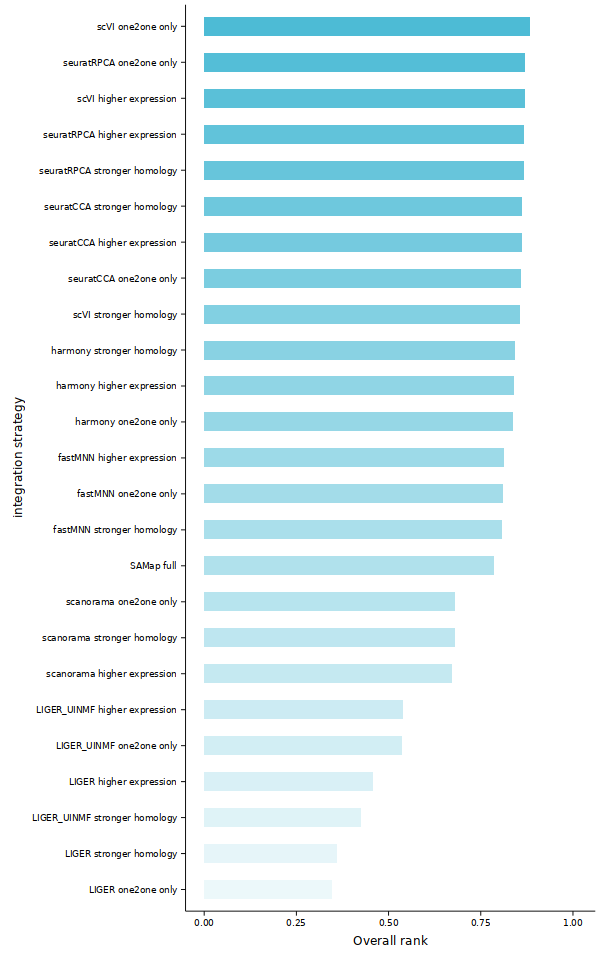

In [38]:
options(repr.plot.width = 5, repr.plot.height = 8)

merged  %>% 
ggplot(aes(x = factor(type, levels = order_type), y = overall_score_cross_task, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x   +
labs(y = 'Overall rank', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) + 
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

overall = merged %>% 
ggplot(aes(x = factor(type, levels = order_type), y = overall_score_cross_task, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Overall score', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) +
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## batch rank

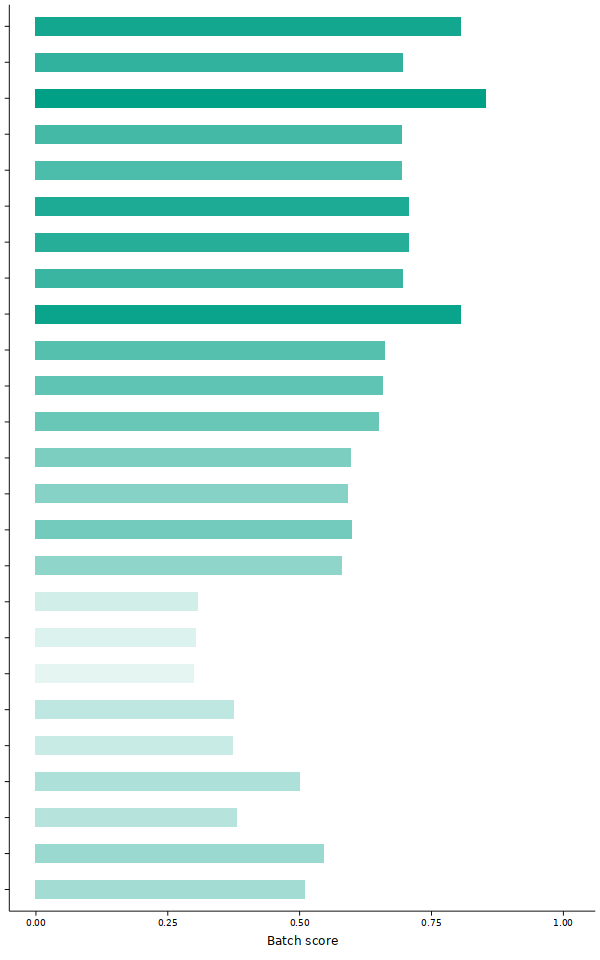

In [41]:
options(repr.plot.width = 5, repr.plot.height = 8)

all_batch_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_score, alpha = cross_task_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

In [42]:
batch_overall = all_batch_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_score, alpha = cross_task_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

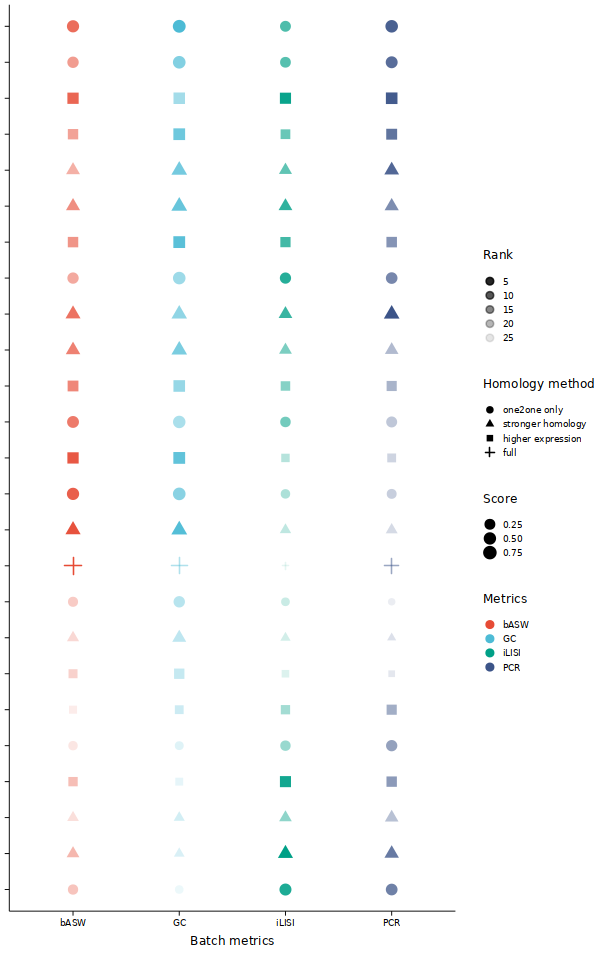

In [44]:
all_batch %>% group_by(type) %>% 
mutate(iLISI_scaled_cross_task = mean(c(iLISI_scaled))) %>% 
mutate(graph_conn_scaled_cross_task = mean(c(graph_conn_scaled))) %>% 
mutate(pcr_scaled_cross_task = mean(c(pcr_scaled))) %>% 
mutate(silhouette_batch_scaled_cross_task = mean(c(silhouette_batch_scaled))) %>% 
#mutate(cross_task_score = mean(c(avg_score))) %>% arrange(desc(cross_task_score)) %>%  ## batch overall score is avg four scores
select(type, homology_method, integration_method, ends_with('cross_task')) %>% unique() %>% 
ungroup() %>% 
mutate(iLISI_scaled_cross_task_rank = dense_rank(desc(iLISI_scaled_cross_task)))%>% 
mutate(graph_conn_scaled_cross_task_rank = dense_rank(desc(graph_conn_scaled_cross_task)))%>% 
mutate(pcr_scaled_cross_task_rank = dense_rank(desc(pcr_scaled_cross_task)))%>% 
mutate(silhouette_batch_scaled_cross_task_rank = dense_rank(desc(silhouette_batch_scaled_cross_task))) %>% 
#mutate(cross_task_score_rank = dense_rank(desc(cross_task_score))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks')  %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled_cross_task, 
                       ifelse(grepl("graph", Metrics), graph_conn_scaled_cross_task, 
                              ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled_cross_task, 
                                     pcr_scaled_cross_task)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_cross_task_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_cross_task_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_cross_task_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_cross_task_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics')


In [45]:
batch_detail = all_batch %>% group_by(type) %>% 
mutate(iLISI_scaled_cross_task = mean(c(iLISI_scaled))) %>% 
mutate(graph_conn_scaled_cross_task = mean(c(graph_conn_scaled))) %>% 
mutate(pcr_scaled_cross_task = mean(c(pcr_scaled))) %>% 
mutate(silhouette_batch_scaled_cross_task = mean(c(silhouette_batch_scaled))) %>% 
#mutate(cross_task_score = mean(c(avg_score))) %>% arrange(desc(cross_task_score)) %>%  ## batch overall score is avg four scores
select(type, homology_method, integration_method, ends_with('cross_task')) %>% unique() %>% 
ungroup() %>% 
mutate(iLISI_scaled_cross_task_rank = dense_rank(desc(iLISI_scaled_cross_task)))%>% 
mutate(graph_conn_scaled_cross_task_rank = dense_rank(desc(graph_conn_scaled_cross_task)))%>% 
mutate(pcr_scaled_cross_task_rank = dense_rank(desc(pcr_scaled_cross_task)))%>% 
mutate(silhouette_batch_scaled_cross_task_rank = dense_rank(desc(silhouette_batch_scaled_cross_task))) %>% 
#mutate(cross_task_score_rank = dense_rank(desc(cross_task_score))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks')  %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled_cross_task, 
                       ifelse(grepl("graph", Metrics), graph_conn_scaled_cross_task, 
                              ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled_cross_task, 
                                     pcr_scaled_cross_task)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_cross_task_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_cross_task_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_cross_task_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_cross_task_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics')

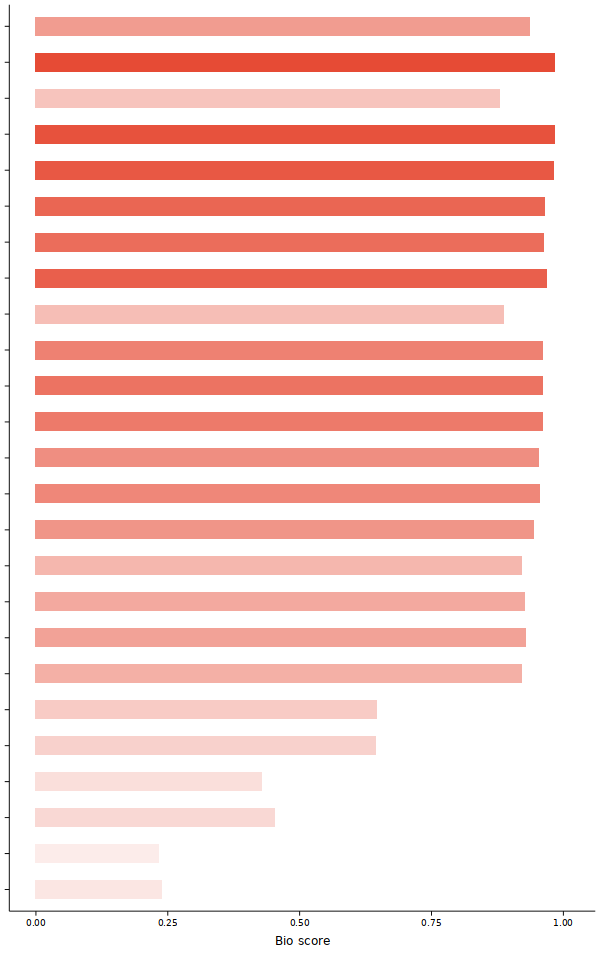

In [46]:

all_bio_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_bio, alpha = cross_task_bio_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

In [47]:
bio_overall = all_bio_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_bio, alpha = cross_task_bio_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

In [48]:
head(all_bio_ranked)

type,homology_method,integration_method,cLISI_scaled_cross_task,silhouette_scaled_cross_task,NMI_scaled_cross_task,ARI_scaled_cross_task,acc_loss_scaled_cross_task,cross_task_bio,cLISI_scaled_cross_task_rank,silhouette_scaled_cross_task_rank,NMI_scaled_cross_task_rank,ARI_scaled_cross_task_rank,acc_loss_scaled_cross_task_rank,cross_task_bio_rank
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
seuratRPCA one2one only,one2one only,seuratRPCA,1.0000000,0.8710553,0.9428723,0.9091596,0.9971137,0.9838454,1,6,5,6,1,1
seuratRPCA higher expression,higher expression,seuratRPCA,0.9997003,0.8917050,0.9441387,0.9160494,0.9941916,0.9829329,2,4,4,5,3,2
seuratRPCA stronger homology,stronger homology,seuratRPCA,0.9995282,0.8775752,0.9278009,0.8976912,0.9952078,0.9812960,6,5,7,8,2,3
seuratCCA one2one only,one2one only,seuratCCA,0.9992821,0.8933886,0.9358846,0.9546101,0.9731141,0.9676496,7,3,6,2,14,4
seuratCCA stronger homology,stronger homology,seuratCCA,0.9988160,0.9682105,0.9446824,0.9569897,0.9640400,0.9646669,12,2,3,1,17,5
seuratCCA higher expression,higher expression,seuratCCA,0.9992456,0.9747432,0.9168691,0.9051610,0.9652708,0.9620176,10,1,8,7,15,6


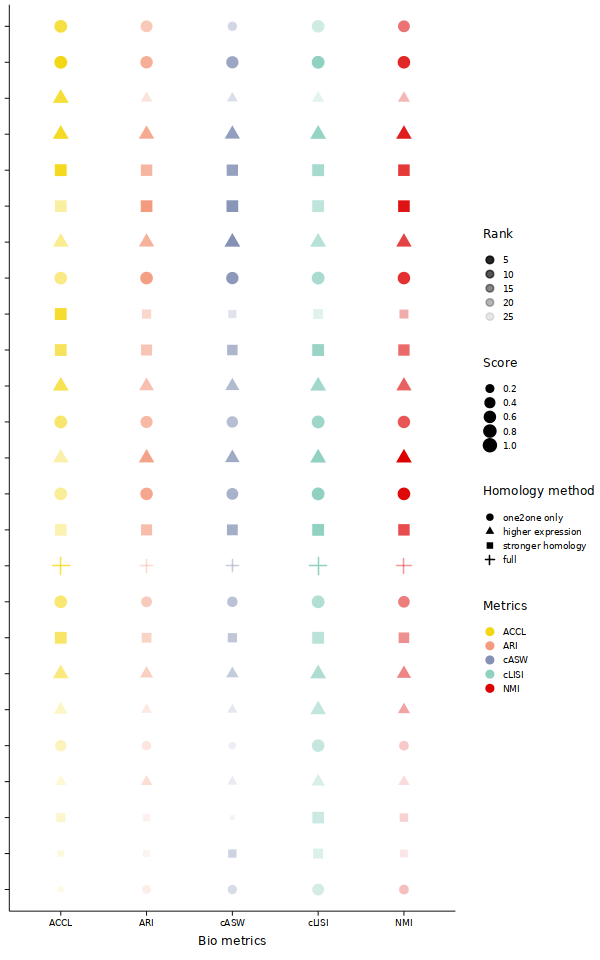

In [55]:
all_bio_ranked %>% select(-cross_task_bio_rank) %>% ungroup() %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled_cross_task, 
                      ifelse(grepl("NMI", Metrics), NMI_scaled_cross_task, 
                             ifelse(grepl("ARI", Metrics), ARI_scaled_cross_task, 
                                    ifelse(grepl("silhouette", Metrics), silhouette_scaled_cross_task, 
                                           acc_loss_scaled_cross_task))))) %>%
mutate(Metrics = gsub("cLISI_scaled_cross_task_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_cross_task_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_cross_task_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_cross_task_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_cross_task_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3)) + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

In [62]:
bio_detail = all_bio_ranked %>% select(-cross_task_bio_rank) %>% ungroup() %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled_cross_task, 
                      ifelse(grepl("NMI", Metrics), NMI_scaled_cross_task, 
                             ifelse(grepl("ARI", Metrics), ARI_scaled_cross_task, 
                                    ifelse(grepl("silhouette", Metrics), silhouette_scaled_cross_task, 
                                           acc_loss_scaled_cross_task))))) %>%
mutate(Metrics = gsub("cLISI_scaled_cross_task_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_cross_task_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_cross_task_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_cross_task_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_cross_task_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method', guide = 'none') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans(), guide = 'none') +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3), guide = 'none') + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


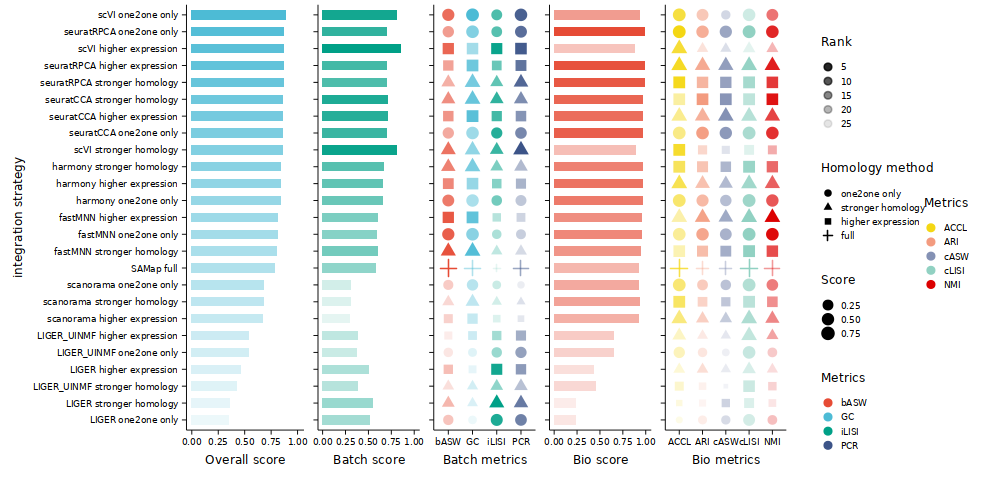

In [63]:
options(repr.plot.width = 8.2, repr.plot.height = 4)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))